In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,precision_score, recall_score, accuracy_score,f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score,mean_squared_error,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
f=pd.read_csv('features.csv',header=None)
l=pd.read_csv('labels.csv',header=None)

In [ ]:
def clas(x):
    if ('ake') in x:
        return 0
    if ('eal') in x:
        return 1
l1=l.copy()
l1[0]=l[0].apply(lambda x:clas(x))
l1[0].unique()

array([0, 1], dtype=int64)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(f,l1,test_size=0.30,shuffle=True)
x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
d={'accuracy':[],"recall":[],'precision':[],'f1':[]}
e=[]

In [ ]:
def hyper(params,dt,x_train,y_train):
    #Hyperparameters of Decision Trees
    clf = GridSearchCV(dt, params,cv=2)
    clf.fit(x_train,y_train)
    #train process
    ct=clf.best_estimator_
    ct.fit(x_train,y_train)
    #predict process
    p_te=ct.predict(x_test)
    print('train score=',ct.score(x_train,y_train),'\ntest score=',ct.score(x_test,y_test))
    #confusion_matrix for desition trees model
    mx= confusion_matrix(y_test,p_te)
    name=['TN','FP','FN','TP']
    mx1=mx.flatten()
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')
    print("%0.2f accuracy" % accuracy_score(y_test,p_te))
    print("%0.2f recall" % recall_score(y_test,p_te))
    print("%0.2f precision" % precision_score(y_test,p_te))
    print("%0.2f f1" % f1_score(y_test,p_te))
    d['accuracy'].append(accuracy_score(y_test,p_te))
    d['recall'].append(recall_score(y_test,p_te))
    d['precision'].append(precision_score(y_test,p_te))
    d['f1'].append(f1_score(y_test,p_te))
    mse= mean_squared_error(y_test,p_te)
    e.append(mse)
    print("%0.2f MSE" % mse)
    fpr,tpr,_=roc_curve(y_test,p_te)
    auc1=auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,label='ROC curve(area+%0.2f)'%auc1)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.xlabel('false posetive rate')
    plt.ylabel('true posetive rate')
    plt.legend()

train score= 0.9937290969899666 
test score= 0.98635477582846
0.99 accuracy
1.00 recall
0.98 precision
0.99 f1
0.01 MSE


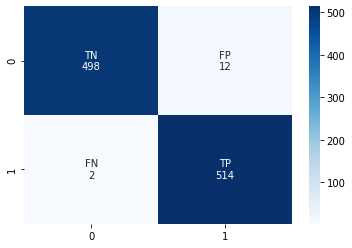

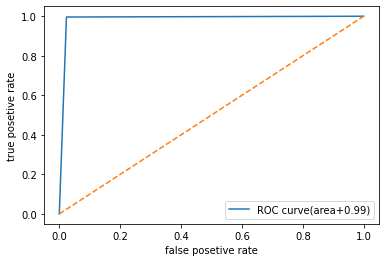

In [ ]:
#DecisionTreeClassifier
params = {'max_leaf_nodes': [2,3,4], 'min_samples_split': [2, 3, 4],'min_impurity_decrease':[0.02,0.01]}
dt=DecisionTreeClassifier()
hyper(params,dt,x_train,y_train)

train score= 1.0 
test score= 0.9961013645224172
1.00 accuracy
1.00 recall
0.99 precision
1.00 f1
0.00 MSE


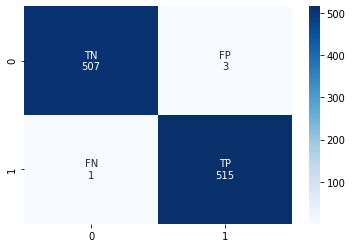

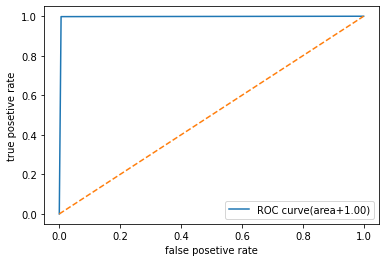

In [ ]:
#Hyperparameters of LogisticRegression
params ={"C":[100,10,1,0.1,0.01], "penalty":["l2"]}
lr0=LogisticRegression()
hyper(params,lr0,x_train,y_train[0])

train score= 0.9983277591973244 
test score= 0.9970760233918129
1.00 accuracy
1.00 recall
1.00 precision
1.00 f1
0.00 MSE


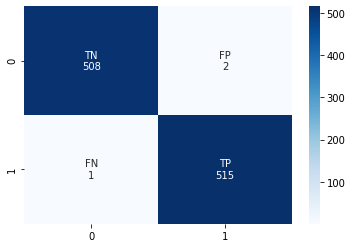

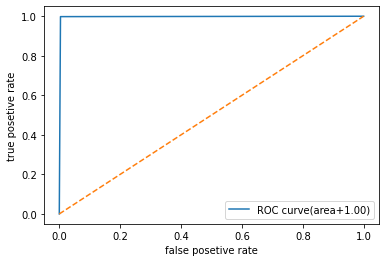

In [ ]:
# SVm
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
params = dict(kernel=kernel,C=C)
hyper(params,SVC(),x_train,y_train[0])

train score= 1.0 
test score= 0.9961013645224172
1.00 accuracy
1.00 recall
0.99 precision
1.00 f1
0.00 MSE


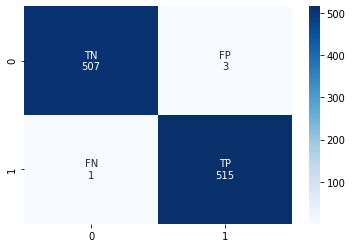

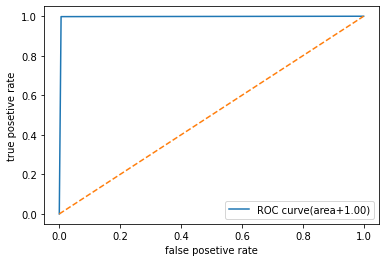

In [ ]:
# RandomForestClassifier
n_estimators = [1000, 2000, 3000]
max_features = ['sqrt', 'log2']
# define grid search
params = dict(n_estimators=n_estimators,max_features=max_features)
hyper(params,RandomForestClassifier(),x_train,y_train[0])

Text(0.5, 1.0, 'mse')

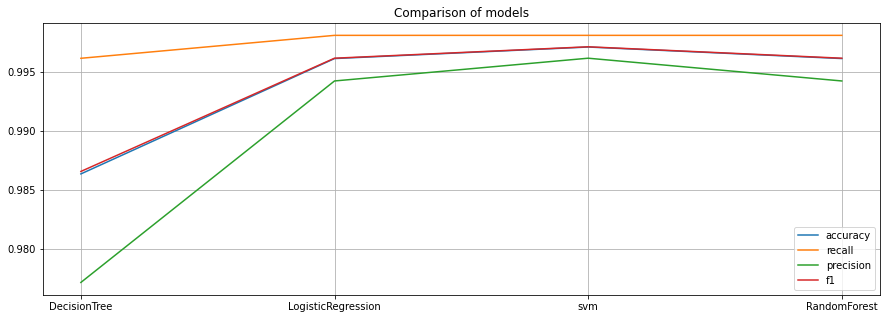

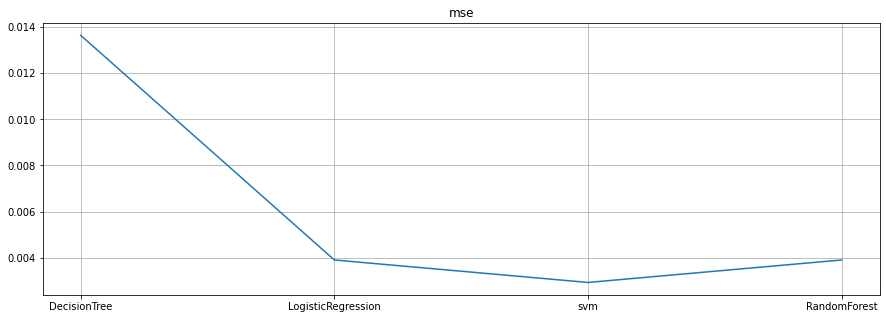

In [ ]:
plt.figure(figsize=(15,5))

for i in d.keys():
    plt.plot(['DecisionTree','LogisticRegression','svm','RandomForest'],d[i],label=i)
plt.legend()
plt.grid()
plt.title('Comparison of models')
plt.figure(figsize=(15,5))
plt.plot(['DecisionTree','LogisticRegression','svm','RandomForest'],e)
plt.grid()
plt.title('mse')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [5]:
#extracted features
#ex=pd.read_csv('feature_extraction_data_analysis.csv')
ex=pd.read_csv("/content/gdrive/MyDrive/feature_extraction_data_analysis.csv")
ex=ex.iloc[:,1:]
exf=ex.iloc[:,:-1]
#exf=exf.iloc[:,:10]
exl=ex.iloc[:,-1:]
exf=exf.reset_index(drop=True)
exl['labels']=exl['labels'].map({'fake':0,'real':1})
#exf['blurriness']=exf['blurriness'].map({'Not Blurry':0,'Blurry':1})
scaler=StandardScaler()
exf=scaler.fit_transform(exf)
#split train & test
x_train, x_test, y_train, y_test= train_test_split(exf,exl,test_size=0.30,shuffle=True)
#x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

<ipython-input-5-cb1a655e48a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exl['labels']=exl['labels'].map({'fake':0,'real':1})


In [ ]:
d={'accuracy':[],"recall":[],'precision':[],'f1':[]}
e=[]

train score= 0.7218736930154747 
test score= 0.6910331384015594
0.69 accuracy
0.51 recall
0.81 precision
0.63 f1
0.31 MSE


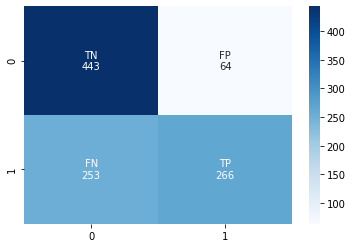

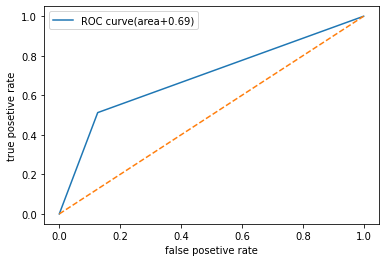

In [ ]:
#DecisionTreeClassifier
params = {'max_leaf_nodes': [2,3,4], 'min_samples_split': [2, 3, 4],'min_impurity_decrease':[0.02,0.01]}
dt=DecisionTreeClassifier()
hyper(params,dt,x_train,y_train)


C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Noname\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

train score= 0.7770807193642827 
test score= 0.7173489278752436
0.72 accuracy
0.66 recall
0.75 precision
0.70 f1
0.28 MSE


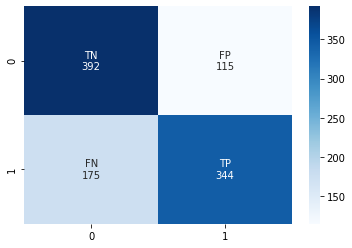

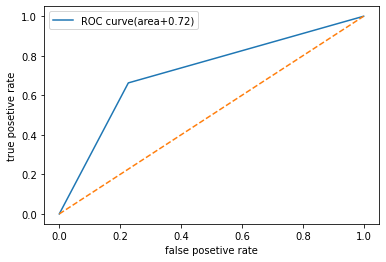

In [ ]:
#Hyperparameters of LogisticRegression
params ={"C":[100,10,1,0.1,0.01], "penalty":["l2"]}
lr0=LogisticRegression()
hyper(params,lr0,x_train,y_train['labels'])

train score= 0.9301547469677959 
test score= 0.7573099415204678
0.76 accuracy
0.74 recall
0.77 precision
0.76 f1
0.24 MSE


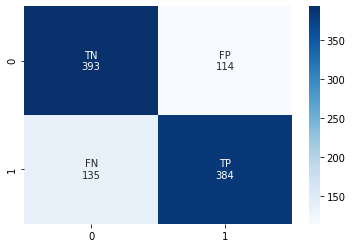

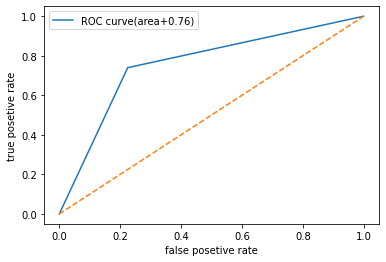

In [ ]:
# SVm
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
params = dict(kernel=kernel,C=C)
hyper(params,SVC(),x_train,y_train['labels'])

train score= 1.0 
test score= 0.7914230019493177
0.79 accuracy
0.75 recall
0.82 precision
0.78 f1
0.21 MSE


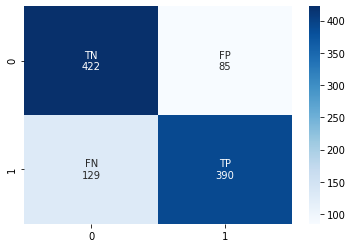

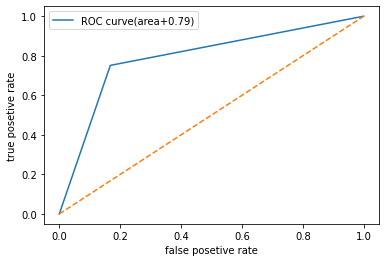

In [ ]:
# RandomForestClassifier
n_estimators = [1000, 2000, 3000]
max_features = ['sqrt', 'log2']
# define grid search
params = dict(n_estimators=n_estimators,max_features=max_features)
hyper(params,RandomForestClassifier(),x_train,y_train['labels'])

Text(0.5, 1.0, 'mse')

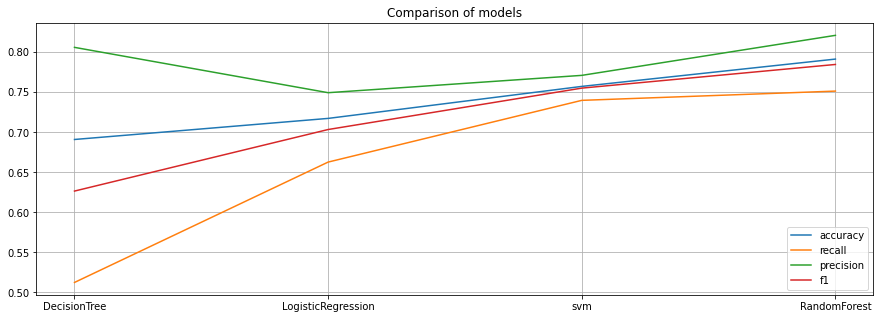

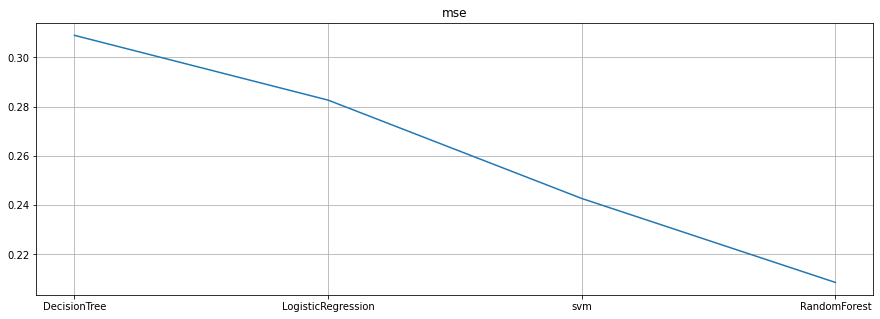

In [ ]:
plt.figure(figsize=(15,5))
for i in d.keys():
    plt.plot(['DecisionTree','LogisticRegression','svm','RandomForest'],d[i],label=i)
plt.legend()
plt.grid()
plt.title('Comparison of models')
plt.figure(figsize=(15,5))
plt.plot(['DecisionTree','LogisticRegression','svm','RandomForest'],e)
plt.grid()
plt.title('mse')

In [10]:
#from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
def eva(pred):
  ltrue=y_test
  print("%0.2f accuracy" % accuracy_score(ltrue,pred))
  print("%0.2f recall" % recall_score(ltrue,pred))
  print("%0.2f precision" % precision_score(ltrue,pred))
  print("%0.2f f1" % f1_score(ltrue,pred))
  mx= confusion_matrix(y_test,pred)
  name=['TN','FP','FN','TP']
  mx1=mx.flatten()
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')
  mse= mean_squared_error(y_test,pred)
  print("%0.2f MSE" % mse)
  fpr,tpr,_=roc_curve(y_test,pred)
  auc1=auc(fpr,tpr)
  plt.figure()
  plt.plot(fpr,tpr,label='ROC curve(area+%0.2f)'%auc1)
  plt.plot([0,1],[0,1],linestyle='--')
  plt.xlabel('false posetive rate')
  plt.ylabel('true posetive rate')
  plt.legend()

Epoch 1/20
75/75 [==============================] - 5s 15ms/step - loss: 0.6328 - accuracy: 0.6441
Epoch 2/20
75/75 [==============================] - 1s 14ms/step - loss: 0.5657 - accuracy: 0.7097
Epoch 3/20
75/75 [==============================] - 1s 14ms/step - loss: 0.5160 - accuracy: 0.7394
Epoch 4/20
75/75 [==============================] - 1s 14ms/step - loss: 0.4778 - accuracy: 0.7729
Epoch 5/20
75/75 [==============================] - 1s 14ms/step - loss: 0.4775 - accuracy: 0.7687
Epoch 6/20
75/75 [==============================] - 1s 14ms/step - loss: 0.4519 - accuracy: 0.7909
Epoch 7/20
75/75 [==============================] - 1s 14ms/step - loss: 0.4607 - accuracy: 0.7704
Epoch 8/20
75/75 [==============================] - 1s 16ms/step - loss: 0.4648 - accuracy: 0.7834
Epoch 9/20
75/75 [==============================] - 1s 16ms/step - loss: 0.4735 - accuracy: 0.7620
Epoch 10/20
75/75 [==============================] - 1s 16ms/step - loss: 0.4290 - accuracy: 0.7938
Epoch 11/

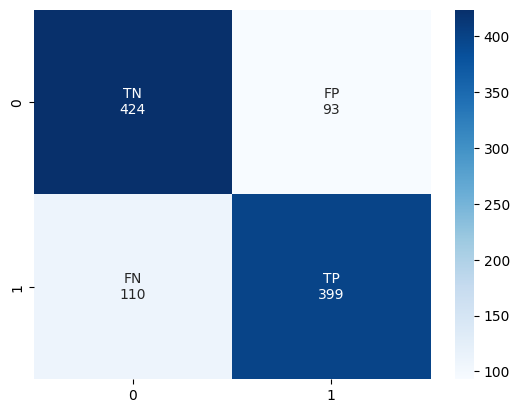

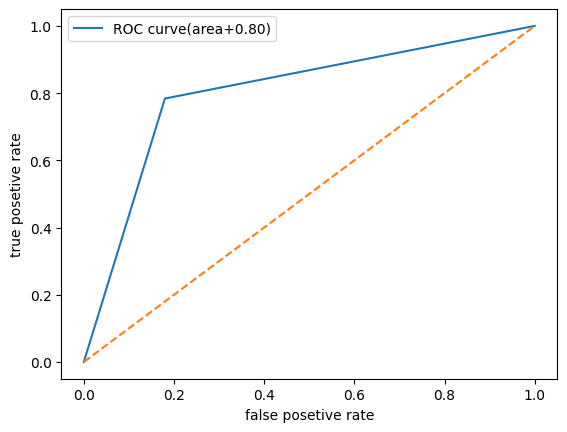

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(5000, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(5000, activation='relu'))
model.add(Dense(5000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= model.fit(x_train, y_train['labels'], batch_size=32, epochs=20)
pred = model.predict(x_test, batch_size=42)
eva(np.round(pred))